In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(f'{len(x_train)} is the size of train dataset \n{len(x_test)} is the size of the test dataset')

60000 is the size of train dataset 
10000 is the size of the test dataset


In [ ]:
x_train[0].shape #each sample is a 28*28 image

(28, 28)

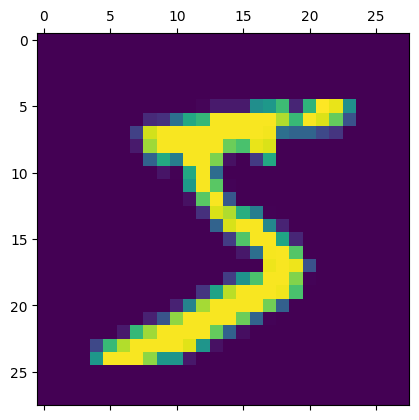

In [ ]:
#lets plot and see how it looks like
plt.matshow(x_train[0]) #note we are using 'matshow' and not just 'show' here

In [ ]:
y_train[0] #this shows that the handwritted number is 5

5

In [ ]:
#converting number from 0-255 to 0-1 for higher accuracy in training, this is called SCALING
x_train = x_train/255
x_test = x_test/255

In [ ]:
#Flattening the matrix from a 2D 28*28 to a single 784
x_train_flatten = x_train.reshape(len(x_train),28*28)
print(x_train_flatten.shape)
print(x_train_flatten[0])

(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [ ]:
x_test_flatten = x_test.reshape(len(x_test),28*28)
print(x_test_flatten.shape)
print(x_test_flatten[0])

(10000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [ ]:
# after flattening

print(x_train_flatten.shape)
print(x_test_flatten.shape)

(60000, 784)
(10000, 784)


In [ ]:
# creating the neural network stack

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

#need to compile and pass bunch of arguments
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_flatten, y_train,epochs=5) #this is where training actually happens, be sure to use the flattened x-train. Ensure that the accuracy when training is high if not convert the number between 0-1
# note: EPOCHS is number of ITERATIONS
# Training accuracy should ideally be 90% or higher

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4729 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9254


In [ ]:
#Testing the model on test dataset
model.evaluate(x_test_flatten,y_test)
#as we can see from result the accuracy is 92%

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9250


[0.26759830117225647, 0.925000011920929]

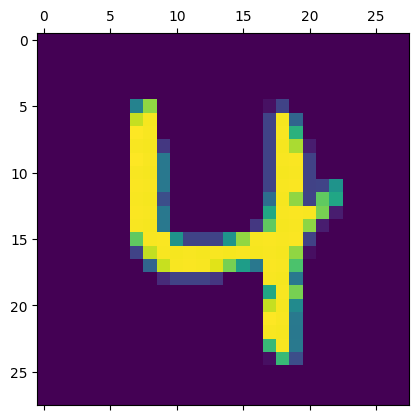

In [ ]:
#lets check the results
plt.matshow(x_test[49])
#from the image below the number is 4

In [ ]:
y_test[49]

4

In [ ]:
predictions = model.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[49] #This is printing all the output scores

array([2.66853161e-03, 5.27843576e-06, 1.40858963e-01, 1.52088644e-03,
       9.98353899e-01, 2.87756091e-04, 1.01439424e-01, 3.46200198e-01,
       1.89254060e-01, 7.24078119e-01], dtype=float32)

In [ ]:
#to find index value with max score we need argmax function from np
np.argmax(predictions[49])

4

In [ ]:
# time to set-up heatmap to see the accuracy of the model
# doc to heatmap : https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix

#first we need all results from the predition
predicted_outcomes = [np.argmax(i) for i in predictions]

cm = tf.math.confusion_matrix(labels = y_test,predictions = predicted_outcomes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    4,    3,    1,    0],
       [   0, 1118,    4,    2,    0,    1,    3,    2,    5,    0],
       [   4,    8,  946,   14,    9,    3,   10,    8,   26,    4],
       [   2,    0,   26,  922,    1,   22,    2,    9,   18,    8],
       [   1,    2,    7,    1,  920,    0,    9,    4,    6,   32],
       [   7,    3,    8,   38,   11,  779,    8,    8,   23,    7],
       [  12,    3,   10,    1,    7,   15,  906,    2,    2,    0],
       [   1,    9,   26,    5,   10,    1,    0,  943,    1,   32],
       [   9,   12,   10,   32,    9,   35,    9,   10,  838,   10],
       [  10,    7,    2,   12,   31,    7,    0,   22,    3,  915]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Actual')

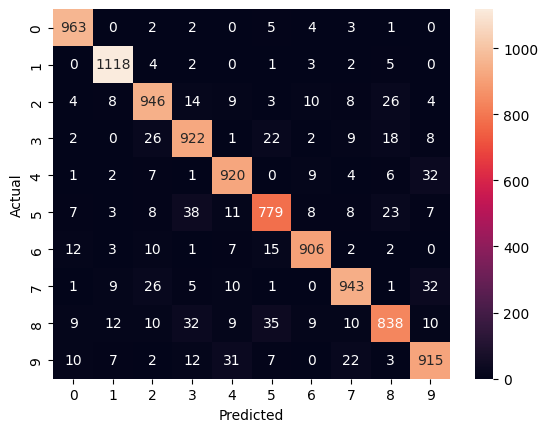

In [ ]:
# presenting the matrix visually

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [146]:
# improving the neural network stack by adding hidden layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

#need to compile and pass bunch of arguments
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train, y_train,epochs=5) #this is where training actually happens, be sure to use the flattened x-train. Ensure that the accuracy when training is high if not convert the number between 0-1
# note: EPOCHS is number of ITERATIONS
# Training accuracy should ideally be 90% or higher
# from the Optimizers ['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl'] with 5 Ephocs, Adam got the highest score on Test samples

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2741 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1273 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0905 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0679 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0542 - accuracy: 0.9833


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9746


[0.08219180256128311, 0.9746000170707703]

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Text(50.722222222222214, 0.5, 'Actual')

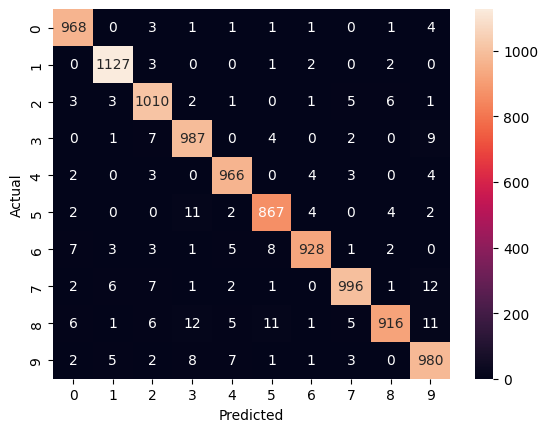

In [ ]:
predicted_outcomes = [np.argmax(i) for i in predictions]

cm = tf.math.confusion_matrix(labels = y_test,predictions = predicted_outcomes)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')